In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) 
#sort_by_target(mnist) 

In [26]:
# from sklearn import datasets
# digits = datasets.load_digits()

In [2]:
X, y = mnist['data'], mnist['target']

In [3]:
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
y[1565]

4

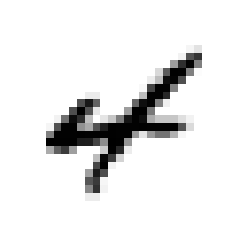

In [5]:
some_digit = X[1565]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [8]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [10]:
# from sklearn.neighbors import KNeighborsClassifier
# knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
# knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

In [9]:
# y_knn_pred = knn_clf.predict(X_test)
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_knn_pred)

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [10]:
k_range = [3 ,4, 5]
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()

In [11]:
grid = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy', verbose=3)

In [12]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=3, weights=uniform, score=0.973, total=13.7min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 13.7min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.972, total=14.0min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 27.7min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.972, total=14.8min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.971, total=15.2min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.972, total=14.5min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.974, total=14.9min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.973, total=14.8min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.973, total=14.3min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.972, total=14.4min
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 436.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 4, 5],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [14]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9740500000000001
{'n_neighbors': 4, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')


In [16]:
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)
y_gridknn_pred = knn_clf.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_gridknn_pred)

0.9714

Shifting an Image

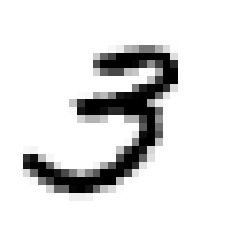

In [9]:
some_digit = X_train[1565]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()

In [72]:
def shiftOnePixel(digit, direction='up'):
    import scipy.ndimage.interpolation as inte 
    digitShaped = digit.reshape(28, 28)
    if direction == 'up':
        shiftDirection = [-1,0]
    elif direction == 'down':
        shiftDirection = [1,0]
    elif direction == 'left':
        shiftDirection = [0,-1]
    elif direction == 'right':
        shiftDirection = [0,1]
    newDigit = inte.shift(digitShaped, shiftDirection, cval=0)

    return newDigit.reshape([-1])

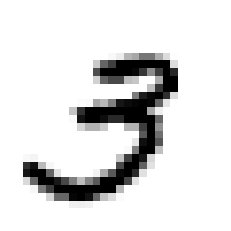

In [74]:
testDigit = shiftOnePixel(X_train[1565], 'down')
plt.imshow(testDigit.reshape(28,28), cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [85]:
X_train_shifts = [row for row in X_train]
y_train_shifts = [label for label in y_train]
len(X_train_shifts)
X_train_shifts[0].shape
# moves = ['up', 'down', 'left', 'right']
# progress = 0
# for i in range(len(X_train)): 
#     for move in moves:
#         newDataPoint = shiftOnePixel(X_train[i])
#         shapedPoint = newDataPoint.reshape(1,784)
#         X_train_shifts.append(shapedPoint)
#         y_train_shifts.append(y[i])

(784,)

In [76]:
X_shift_array = np.array(X_train_shifts)
y_shift_array = np.array(y_train_shifts)

In [77]:
shuffle_index = np.random.permutation(len(X_shift_array))
X_shift_array = X_shift_array[shuffle_index]
y_shift_array = y_shift_array[shuffle_index]

In [78]:
knn_clf_shift = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf_shift.fit(X_train_shifts, y_train_shifts)
y_gridknn_pred_shift = knn_clf.predict(X_test)
accuracy_score(y_test, y_gridknn_pred_shift)

ValueError: Expected 2D array, got 1D array instead:
array=[array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  86., 232., 157.,  74.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  96., 244., 254.,
       254., 187.,  25.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 147., 242., 254., 249.,  81.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  30., 158., 251., 245.,  73.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 215., 254.,
       129.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 215., 254., 129.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2., 148., 244.,
       231.,  47.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  16., 100., 221., 254., 230.,  44.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  49., 168., 140., 194., 254., 254., 194.,
        48.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 209.,
       254., 254., 254., 254., 250.,   2.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,  26., 123., 149., 187., 252., 254.,
       182.,  17.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  76., 243., 254., 169.,  20.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        76., 254., 254.,  85.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   2., 164., 254., 170.,   9.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  31., 235., 254.,  79.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  19., 228., 254.,
        59.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  26.,   2.,
         0.,   0.,   1., 127., 254., 203.,  14.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 185.,  90.,   0.,  18., 172., 254., 249.,
        55.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 185.,
       250., 245., 247., 254., 244.,  79.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 113., 209., 254., 254., 171.,  42.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.])
 array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  13., 180., 254., 255., 179.,  12.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 153., 253.,
       253., 253., 253.,  30.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 185., 253., 253., 253., 181.,  13.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  51., 144., 251.,
       253., 253., 244.,  83.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 139., 253., 253., 253., 253., 206.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  22., 201., 253.,
       253., 253., 127.,  35.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  32., 204., 253., 253., 253., 253.,  22.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 112., 253., 253.,
       253., 249., 142.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 247., 253., 253., 253., 142.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  15., 166., 252., 253.,
       253., 227.,  57.,  78.,  78.,  92., 231.,  96.,  78.,  42.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  47., 253., 253., 253., 253., 176., 145., 253., 253.,
       253., 253., 253., 253., 218., 140.,   9.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  47., 253., 253.,
       253., 253., 253., 253., 253., 253., 253., 253., 253., 253., 253.,
       253.,  92.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  47., 253., 253., 253., 253., 253., 253., 253.,
       253., 253., 253., 253., 253., 253., 253., 227.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  47., 253.,
       253., 253., 253., 253., 253., 253., 239., 238., 237., 242., 253.,
       253., 253., 250.,  98.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  47., 253., 253., 253., 253., 253., 253.,
       193.,  12.,   0.,   0.,  70., 253., 253., 253., 253., 145.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  47.,
       253., 253., 253., 253., 253., 253., 154.,  62.,  62.,  62., 208.,
       253., 253., 253., 246.,  22.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,  47., 253., 253., 253., 253., 253.,
       253., 253., 253., 253., 253., 253., 253., 253., 253., 146.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        47., 253., 253., 253., 253., 253., 253., 253., 253., 253., 253.,
       253., 253., 253., 161.,  53.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  37., 199., 219., 253., 253.,
       253., 253., 253., 253., 253., 253., 253., 250., 128.,   7.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  37.,  99., 183., 253., 253., 253., 253., 253.,
       253., 117.,  93.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.])
 array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 139., 254., 128.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  30., 226., 253.,
       111.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   9., 203., 253., 183.,  13.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 159., 254., 236.,
        29.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 141., 254., 236.,  50.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 143., 249., 253.,  84.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  74., 249., 251.,  96.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 102., 254., 253., 128.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        49., 254., 255., 140.,  17.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,  26., 190., 253., 199.,  11.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        97., 253., 244.,  17.,   0.,   0.,  17.,   9.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,  51., 247., 244.,  69.,   0.,  85.,
       168., 234., 210.,  50.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       128., 254., 237., 104., 255., 254., 254., 254., 255., 115.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 161., 253., 253., 253., 254.,
       244., 211., 253., 254.,  98.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  86., 253., 253., 253., 254., 244., 245., 253., 155.,   4.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  70., 253., 253., 253.,
       254., 253., 253., 151.,  25.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  70., 254., 254., 254., 236., 167.,  51.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  70., 253., 181.,
        23.,  17.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  70., 253.,  62.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  45., 245.,
        46.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.])
 ...
 array([[-2.95789922e-21, -2.38628727e-20,  3.06467544e-20,
         5.51797159e-19, -2.25574124e-18, -6.24565400e-18,
        -5.48462779e-17,  7.45537344e-16,  2.04886795e-15,
         6.45853458e-17,  2.60696061e-17,  2.55517463e-18,
        -1.55130547e-18, -2.46253527e-19, -2.19945419e-19,
        -1.71334542e-19,  1.31243856e-18, -7.17520096e-19,
         1.14878401e-18,  7.77703892e-17,  6.90518052e-16,
        -6.74416221e-15, -6.96655789e-15, -1.46104407e-16,
        -1.17844937e-17, -7.98554095e-18,  2.09329409e-18,
         4.79726321e-19,  1.11662399e-19,  8.08892260e-20,
        -8.28535970e-20, -1.42998821e-18, -1.16947613e-17,
        -1.14974224e-17,  1.98747206e-16, -3.19517580e-15,
        -5.29864122e-15, -5.12985191e-17,  2.61068881e-18,
         1.06445150e-17, -9.75570030e-19,  1.25538565e-18,
        -3.91190561e-19,  5.12557050e-19,  2.55991569e-18,
        -1.29992181e-18,  1.15978613e-17,  2.49745831e-16,
        -7.33780046e-16,  2.69953774e-14,  2.44228784e-14,
         3.04768579e-16,  8.24305284e-17,  1.42958870e-17,
        -8.36198437e-19, -5.74692285e-18,  6.81168058e-19,
         3.50827272e-19,  3.00767634e-19, -8.27595128e-18,
        -3.50993020e-17, -3.45008303e-17, -1.06627056e-15,
         1.19241436e-14,  2.58347907e-14,  1.40695687e-15,
         2.56655906e-16,  8.56215472e-17,  2.65413178e-17,
         8.62562228e-19,  1.35102679e-18,  2.45791503e-18,
        -1.14376049e-18, -2.87772622e-17, -1.97846536e-17,
         1.25471464e-15,  9.12798489e-15,  2.16643413e-14,
         1.77715895e-14, -3.23569368e-16, -3.31815408e-16,
         1.86724386e-16,  1.16598405e-17, -2.51969305e-17,
         1.20231815e-18,  3.04736440e-19, -1.33706173e-18,
        -2.09773416e-17, -9.07693780e-17,  2.46008800e-17,
         2.73406655e-15,  1.79486499e-14,  1.62569272e-14,
         1.63087864e-14, -8.21231642e-16, -1.23659883e-18,
         5.08175572e-17,  1.44519802e-17, -2.92669765e-17,
         1.30181293e-16, -4.34568372e-16,  1.64675698e-15,
        -6.41524060e-15,  2.06726074e-14,  4.38260579e-14,
         2.18000000e+02,  2.17000000e+02, -8.96053817e-16,
        -1.25864604e-15,  2.12989384e-16,  1.84643896e-16,
        -4.45025713e-16, -1.67059548e-17,  5.12706220e-17,
        -1.89894416e-16,  6.50627487e-16, -2.58780898e-15,
         9.61116099e-15,  3.02578458e-14,  1.25000000e+02,
         2.17000000e+02,  3.00000000e+01,  6.35678314e-15,
        -8.31068407e-16, -1.63948811e-18,  2.97020804e-17,
         3.01854817e-17, -1.26315374e-16,  4.66461293e-16,
        -1.40185811e-15,  6.16159931e-15,  3.21072184e-14,
         9.40000000e+01,  2.47000000e+02,  2.15000000e+02,
        -7.87750030e-17,  2.25071437e-17, -9.45202987e-17,
         1.54346128e-16, -4.18780804e-16, -1.36025001e-17,
         4.80453956e-17, -1.70772827e-16,  6.54127869e-16,
        -2.32528847e-15,  2.21040790e-14,  2.70000000e+01,
         2.21000000e+02,  2.52000000e+02,  1.49000000e+02,
         1.10000000e+01, -1.48560102e-15,  1.92557881e-16,
         2.52116545e-17,  1.16817741e-16, -4.93397151e-16,
         1.76148154e-15, -5.41091900e-15,  2.27897205e-14,
         2.92812676e-14,  2.12000000e+02,  2.52000000e+02,
         2.15000000e+02,  5.90883708e-16, -1.69934566e-15,
         5.30483709e-16,  3.09464127e-16, -3.18111393e-16,
        -9.39312937e-18,  5.63249921e-17, -1.60829368e-16,
         6.89341167e-16, -2.31854077e-15,  2.70383094e-14,
         3.70000000e+01,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  7.10000000e+01, -1.82979618e-16,
        -1.40996851e-16,  3.86745431e-18, -8.06484322e-17,
         2.74837001e-16, -1.18403909e-15,  4.41443331e-15,
         2.69973474e-14,  8.40000000e+01,  2.53000000e+02,
         2.52000000e+02,  2.15000000e+02, -2.99708547e-16,
        -4.21899512e-16, -3.58039544e-16,  2.26887068e-16,
        -3.62158592e-16,  3.36930992e-17, -1.22667621e-16,
         4.44834319e-16, -1.71218080e-15,  6.77781454e-15,
         2.32767290e-14,  9.90000000e+01,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  7.10000000e+01,
         3.21836890e-16, -3.61766846e-17,  7.40922380e-17,
        -2.75924067e-16,  9.58877559e-16, -3.34070306e-15,
         1.26919309e-14,  3.07440049e-14,  1.44000000e+02,
         2.53000000e+02,  2.52000000e+02,  2.15000000e+02,
        -7.06271948e-15, -3.75523988e-15, -1.09222665e-15,
        -7.76261082e-17, -3.80564648e-16,  1.00994222e-16,
        -3.64217422e-16,  1.21709759e-15, -4.58050075e-15,
         1.74059376e-14,  2.94983487e-14,  1.81000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.52000000e+02,
         7.10000000e+01,  5.58471361e-16,  1.35629351e-17,
         1.19483459e-16, -2.15455213e-16,  7.79433727e-16,
        -3.56736981e-15,  1.28914861e-14,  2.77230392e-14,
         1.44000000e+02,  2.53000000e+02,  2.52000000e+02,
         1.74000000e+02,  3.87990408e-17, -1.62685645e-15,
        -7.91190991e-16,  2.89371085e-17, -3.17686633e-16,
         8.87108601e-17, -2.90342293e-16,  8.73165114e-16,
        -3.22313484e-15,  1.91288150e-14,  1.10000000e+01,
         1.91000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.41000000e+02,  6.10000000e+01, -1.32117451e-16,
        -1.03742257e-16, -5.08262597e-17, -4.06686867e-16,
         1.46894323e-15, -1.20267963e-15,  2.43773194e-14,
         2.70000000e+01,  2.21000000e+02,  2.53000000e+02,
         2.52000000e+02,  7.10000000e+01, -6.35367528e-16,
         5.56422186e-17,  1.03428072e-17,  2.96213664e-17,
        -4.38268226e-17, -4.65839267e-17,  1.88638525e-16,
        -7.78226473e-16,  2.87569511e-15,  2.57900091e-14,
         7.30000000e+01,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  1.79000000e+02,  1.18492051e-14,
         6.28405487e-16,  8.49689028e-16,  7.23560033e-16,
         4.17033746e-16, -1.77815006e-15, -7.20696733e-15,
         2.49514865e-14,  3.70000000e+01,  2.52000000e+02,
         2.53000000e+02,  2.52000000e+02,  7.10000000e+01,
        -3.62316597e-15, -3.44658340e-16,  4.74290796e-17,
         3.69808249e-17, -1.84105846e-17, -3.77558702e-17,
         1.80382547e-16, -7.30611851e-16,  2.63104255e-15,
         2.64705523e-14,  7.30000000e+01,  2.53000000e+02,
         2.53000000e+02,  2.53000000e+02,  3.50000000e+01,
        -3.24376481e-15, -1.89285328e-15, -2.08213948e-15,
        -2.10509152e-15, -2.90185449e-15,  9.88489235e-15,
         1.54692923e-14,  4.81703005e-14,  3.70000000e+01,
         2.53000000e+02,  2.55000000e+02,  2.11000000e+02,
         3.10000000e+01, -5.76647000e-15, -1.19143602e-15,
        -7.04158048e-17, -2.57018441e-17,  4.13841972e-17,
        -1.67394624e-16,  6.15803839e-16, -2.37214856e-15,
         7.81807854e-15,  2.45630431e-14,  1.15000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.52000000e+02,
         3.50000000e+01,  1.43876131e-14,  2.68988028e-14,
         2.81779114e-14,  2.64656899e-14,  2.62299421e-14,
         2.21726100e-14,  2.71737440e-14,  2.10000000e+01,
         9.90000000e+01,  2.52000000e+02,  2.53000000e+02,
         2.52000000e+02,  1.95000000e+02, -8.73248208e-15,
        -2.99961782e-15, -2.66139588e-16,  1.18621329e-17,
        -4.07544119e-16, -3.21474826e-16,  1.73726562e-15,
        -6.10023172e-15,  2.21363053e-14,  1.67419843e-14,
         2.17000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  5.60000000e+01,  6.00000000e+00,
         3.70000000e+01,  3.70000000e+01,  3.70000000e+01,
         3.70000000e+01,  1.20000000e+02,  1.82000000e+02,
         2.01000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.53000000e+02,  2.41000000e+02,  1.02000000e+02,
        -1.88638988e-15, -5.56385430e-16, -3.40575107e-17,
         2.47469345e-17, -1.44727507e-16, -3.07787107e-16,
         1.79150020e-15, -6.75413028e-15,  2.18388407e-14,
         2.64641107e-14,  2.17000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.21000000e+02,
         1.60000000e+02,  2.52000000e+02,  2.53000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.53000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.53000000e+02,  1.79000000e+02,
        -1.00071302e-14, -2.27647128e-15,  4.26145402e-16,
         8.61670988e-17,  1.67506612e-17,  9.70641177e-17,
        -4.39731750e-16,  1.65509731e-15, -6.21535195e-15,
         2.52602231e-14,  3.09813405e-14,  2.18000000e+02,
         2.53000000e+02,  2.53000000e+02,  2.53000000e+02,
         2.53000000e+02,  2.53000000e+02,  2.53000000e+02,
         2.55000000e+02,  2.53000000e+02,  2.53000000e+02,
         2.53000000e+02,  2.55000000e+02,  2.22000000e+02,
         1.60000000e+02,  2.53000000e+02,  2.55000000e+02,
         9.80000000e+01, -3.81604652e-15, -1.47751750e-15,
        -1.58736690e-16, -5.63310512e-18,  5.19467808e-18,
         3.51613736e-17, -4.43858865e-16,  1.63870594e-15,
        -6.13178156e-15,  2.41929324e-14,  2.08786847e-14,
         2.17000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.53000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  1.19000000e+02,
         2.50000000e+01,  2.60000000e+01,  2.21000000e+02,
         2.53000000e+02,  1.79000000e+02, -1.02186663e-14,
        -2.77597205e-15, -6.24877661e-16, -1.38589273e-16,
        -2.72654237e-17,  9.15258552e-17, -3.54799434e-16,
         1.53987108e-15, -5.47161796e-15,  2.04576231e-14,
         2.38332224e-14,  1.96000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.53000000e+02,
         2.20000000e+02,  1.95000000e+02,  7.10000000e+01,
        -8.69788202e-16,  1.15720809e-14,  2.51672894e-14,
         1.44000000e+02,  2.53000000e+02,  1.79000000e+02,
        -3.94138353e-15, -2.21862382e-15, -2.40408112e-16,
        -5.50030151e-17,  1.02594303e-17,  9.02931269e-17,
         5.35550243e-17, -1.24077734e-16,  1.61730711e-16,
        -1.41449297e-15,  1.90663573e-14,  3.10000000e+01,
         2.11000000e+02,  2.52000000e+02,  2.52000000e+02,
         1.28000000e+02,  1.08000000e+02,  1.08000000e+02,
         1.08000000e+02,  1.50000000e+01, -8.82830194e-15,
         1.67812323e-15, -2.21173189e-15,  1.37201027e-14,
         3.01392910e-14,  1.44000000e+02,  2.53000000e+02,
         1.79000000e+02, -4.05162717e-15, -1.31907932e-17,
         2.73394390e-16,  7.28485363e-18, -1.37023455e-17,
         9.08926154e-17, -1.09984188e-17,  3.27971964e-17,
        -1.37971283e-16,  8.55624288e-16, -2.17667743e-15,
         8.98268165e-15, -3.80226096e-15,  8.40000000e+01,
         8.30000000e+01,  1.34794027e-16, -1.86895138e-15,
        -2.02241041e-15, -1.33482362e-15, -1.06266835e-15,
        -1.02445358e-15,  3.66204754e-16, -8.25248023e-16,
         4.06307275e-15,  2.91759300e-14,  8.40000000e+01,
         2.55000000e+02,  1.80000000e+02, -3.60450746e-15,
         1.39968911e-17,  3.74170606e-16,  7.20372630e-18,
        -3.99911174e-18,  8.33858301e-17,  2.36487619e-18,
        -4.07529071e-18,  1.89236166e-17,  8.06028091e-17,
         4.65027183e-16,  1.42422538e-15, -7.77998706e-15,
        -3.37015904e-15,  1.76176128e-15, -1.14940937e-16,
        -1.45451328e-15, -2.95466781e-16,  4.78662913e-16,
         4.78347832e-16,  7.15173422e-16, -5.33810468e-16,
         1.77939266e-15, -7.47578178e-15,  3.23859532e-14,
         3.60274038e-14,  2.53000000e+02,  1.79000000e+02,
         1.61866741e-15, -2.65005574e-16, -2.49916500e-16,
        -8.58106524e-17, -2.70045331e-17,  6.37245242e-17,
         2.32496208e-18,  3.09094498e-19,  2.64571737e-18,
         2.06583192e-17,  1.47271029e-17,  1.14137565e-16,
        -8.26968159e-16,  3.10950737e-16,  2.62167329e-16,
        -4.07294128e-16, -3.97363578e-18,  2.66192951e-16,
         4.07765367e-16,  3.30407703e-17,  8.90786558e-17,
        -6.31712499e-16,  1.77046570e-15, -7.61857410e-15,
         3.02791841e-14,  2.14512326e-14,  2.53000000e+02,
         1.79000000e+02, -2.73473952e-15, -1.61867405e-15,
         5.01097482e-17,  2.70070151e-18, -3.31569786e-17,
         5.88035505e-17,  4.51236287e-19,  5.89187615e-19,
         2.00674281e-19,  2.64676835e-18,  2.07678677e-17,
         1.14155277e-16,  9.14516261e-17,  1.45286767e-16,
         6.05931704e-17, -5.06645265e-17, -2.84748706e-17,
        -1.20848816e-16,  6.09504273e-17, -5.46099012e-17,
         1.78155926e-16, -5.78681716e-16,  1.89382370e-15,
        -7.49895897e-15,  2.93900107e-14,  2.47686816e-14,
         2.53000000e+02,  1.79000000e+02, -4.72738581e-15,
        -1.80917971e-15, -2.43148211e-16,  1.22865267e-17,
         3.44075448e-17,  7.55973460e-17,  5.30762387e-21,
         1.75554182e-20,  1.83662785e-19,  1.93119382e-18,
         6.06799436e-18,  8.63896921e-18,  5.43689992e-17,
        -2.56034269e-17, -7.97541574e-18, -3.51480582e-17,
        -1.81942545e-17, -3.12968239e-17, -1.26261294e-18,
        -1.84311739e-17, -6.33164545e-18, -9.52944186e-18,
        -1.06623272e-16, -1.05417286e-16, -6.85423097e-17,
         3.81901967e-15,  1.11045635e-14, -4.84176325e-15,
         2.72489536e-16,  2.85858922e-16, -8.01870719e-17,
        -6.74399792e-18,  5.24805933e-18, -6.76724440e-18,
         1.02463488e-21, -2.24405115e-20,  1.35324223e-19,
         1.72322503e-19,  6.29652106e-20,  1.12558668e-18,
         1.45983055e-17, -9.04595107e-18,  1.18576538e-17,
        -1.25732491e-17, -8.03569040e-18, -3.48831609e-19,
         5.30323714e-18,  7.78211234e-19,  9.73723887e-20,
        -2.06311709e-18, -1.44997008e-17, -8.68554535e-17,
        -6.96315776e-17,  1.31104737e-15,  8.16382258e-16,
        -6.76752896e-16, -8.52889128e-17,  1.44459618e-16,
         1.21460132e-17,  5.13521573e-19, -1.47427654e-18,
        -1.88056996e-18, -6.65330631e-21,  2.74992629e-21,
         2.72055784e-20,  1.17126656e-19,  1.85357829e-19,
         5.19631457e-19,  8.62166331e-19,  1.61401063e-18,
         2.88289554e-18, -8.61438284e-19,  6.53451533e-19,
        -5.38646207e-19,  1.48976232e-18,  5.81833885e-20,
         2.77199545e-19, -2.15845835e-19, -3.64610154e-18,
        -1.55362387e-17,  7.06281890e-18,  2.62664268e-16,
         7.01184979e-16,  7.90555500e-17, -9.61326150e-17,
        -3.05964457e-17, -1.47445866e-21, -1.34096296e-18,
        -2.92853793e-19,  4.58181868e-20, -1.93998044e-21,
        -2.11172080e-21, -6.97731179e-21, -1.74128771e-20,
        -2.62295441e-19, -3.85186855e-19,  5.37179606e-18,
        -5.65002796e-18, -4.95779899e-18,  3.87593791e-18,
         2.27769796e-18,  1.96131535e-18,  2.83234180e-18,
        -1.44462566e-18, -2.07353231e-18, -1.09265651e-19,
        -4.06192164e-19,  3.28363629e-18,  1.36247264e-17,
         2.52750620e-17,  2.37408216e-15,  1.47075372e-15,
        -2.02541256e-18, -1.25715371e-18,  2.94891733e-21,
         5.13521573e-19, -6.48137185e-20,  1.67838437e-20,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])
 array([[-2.95789922e-21, -2.38628727e-20,  3.06467544e-20,
         5.51797159e-19, -2.25574124e-18, -6.24565400e-18,
        -5.48462779e-17,  7.45537344e-16,  2.04886795e-15,
         6.45853458e-17,  2.60696061e-17,  2.55517463e-18,
        -1.55130547e-18, -2.46253527e-19, -2.19945419e-19,
        -1.71334542e-19,  1.31243856e-18, -7.17520096e-19,
         1.14878401e-18,  7.77703892e-17,  6.90518052e-16,
        -6.74416221e-15, -6.96655789e-15, -1.46104407e-16,
        -1.17844937e-17, -7.98554095e-18,  2.09329409e-18,
         4.79726321e-19,  1.11662399e-19,  8.08892260e-20,
        -8.28535970e-20, -1.42998821e-18, -1.16947613e-17,
        -1.14974224e-17,  1.98747206e-16, -3.19517580e-15,
        -5.29864122e-15, -5.12985191e-17,  2.61068881e-18,
         1.06445150e-17, -9.75570030e-19,  1.25538565e-18,
        -3.91190561e-19,  5.12557050e-19,  2.55991569e-18,
        -1.29992181e-18,  1.15978613e-17,  2.49745831e-16,
        -7.33780046e-16,  2.69953774e-14,  2.44228784e-14,
         3.04768579e-16,  8.24305284e-17,  1.42958870e-17,
        -8.36198437e-19, -5.74692285e-18,  6.81168058e-19,
         3.50827272e-19,  3.00767634e-19, -8.27595128e-18,
        -3.50993020e-17, -3.45008303e-17, -1.06627056e-15,
         1.19241436e-14,  2.58347907e-14,  1.40695687e-15,
         2.56655906e-16,  8.56215472e-17,  2.65413178e-17,
         8.62562228e-19,  1.35102679e-18,  2.45791503e-18,
        -1.14376049e-18, -2.87772622e-17, -1.97846536e-17,
         1.25471464e-15,  9.12798489e-15,  2.16643413e-14,
         1.77715895e-14, -3.23569368e-16, -3.31815408e-16,
         1.86724386e-16,  1.16598405e-17, -2.51969305e-17,
         1.20231815e-18,  3.04736440e-19, -1.33706173e-18,
        -2.09773416e-17, -9.07693780e-17,  2.46008800e-17,
         2.73406655e-15,  1.79486499e-14,  1.62569272e-14,
         1.63087864e-14, -8.21231642e-16, -1.23659883e-18,
         5.08175572e-17,  1.44519802e-17, -2.92669765e-17,
         1.30181293e-16, -4.34568372e-16,  1.64675698e-15,
        -6.41524060e-15,  2.06726074e-14,  4.38260579e-14,
         2.18000000e+02,  2.17000000e+02, -8.96053817e-16,
        -1.25864604e-15,  2.12989384e-16,  1.84643896e-16,
        -4.45025713e-16, -1.67059548e-17,  5.12706220e-17,
        -1.89894416e-16,  6.50627487e-16, -2.58780898e-15,
         9.61116099e-15,  3.02578458e-14,  1.25000000e+02,
         2.17000000e+02,  3.00000000e+01,  6.35678314e-15,
        -8.31068407e-16, -1.63948811e-18,  2.97020804e-17,
         3.01854817e-17, -1.26315374e-16,  4.66461293e-16,
        -1.40185811e-15,  6.16159931e-15,  3.21072184e-14,
         9.40000000e+01,  2.47000000e+02,  2.15000000e+02,
        -7.87750030e-17,  2.25071437e-17, -9.45202987e-17,
         1.54346128e-16, -4.18780804e-16, -1.36025001e-17,
         4.80453956e-17, -1.70772827e-16,  6.54127869e-16,
        -2.32528847e-15,  2.21040790e-14,  2.70000000e+01,
         2.21000000e+02,  2.52000000e+02,  1.49000000e+02,
         1.10000000e+01, -1.48560102e-15,  1.92557881e-16,
         2.52116545e-17,  1.16817741e-16, -4.93397151e-16,
         1.76148154e-15, -5.41091900e-15,  2.27897205e-14,
         2.92812676e-14,  2.12000000e+02,  2.52000000e+02,
         2.15000000e+02,  5.90883708e-16, -1.69934566e-15,
         5.30483709e-16,  3.09464127e-16, -3.18111393e-16,
        -9.39312937e-18,  5.63249921e-17, -1.60829368e-16,
         6.89341167e-16, -2.31854077e-15,  2.70383094e-14,
         3.70000000e+01,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  7.10000000e+01, -1.82979618e-16,
        -1.40996851e-16,  3.86745431e-18, -8.06484322e-17,
         2.74837001e-16, -1.18403909e-15,  4.41443331e-15,
         2.69973474e-14,  8.40000000e+01,  2.53000000e+02,
         2.52000000e+02,  2.15000000e+02, -2.99708547e-16,
        -4.21899512e-16, -3.58039544e-16,  2.26887068e-16,
        -3.62158592e-16,  3.36930992e-17, -1.22667621e-16,
         4.44834319e-16, -1.71218080e-15,  6.77781454e-15,
         2.32767290e-14,  9.90000000e+01,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  7.10000000e+01,
         3.21836890e-16, -3.61766846e-17,  7.40922380e-17,
        -2.75924067e-16,  9.58877559e-16, -3.34070306e-15,
         1.26919309e-14,  3.07440049e-14,  1.44000000e+02,
         2.53000000e+02,  2.52000000e+02,  2.15000000e+02,
        -7.06271948e-15, -3.75523988e-15, -1.09222665e-15,
        -7.76261082e-17, -3.80564648e-16,  1.00994222e-16,
        -3.64217422e-16,  1.21709759e-15, -4.58050075e-15,
         1.74059376e-14,  2.94983487e-14,  1.81000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.52000000e+02,
         7.10000000e+01,  5.58471361e-16,  1.35629351e-17,
         1.19483459e-16, -2.15455213e-16,  7.79433727e-16,
        -3.56736981e-15,  1.28914861e-14,  2.77230392e-14,
         1.44000000e+02,  2.53000000e+02,  2.52000000e+02,
         1.74000000e+02,  3.87990408e-17, -1.62685645e-15,
        -7.91190991e-16,  2.89371085e-17, -3.17686633e-16,
         8.87108601e-17, -2.90342293e-16,  8.73165114e-16,
        -3.22313484e-15,  1.91288150e-14,  1.10000000e+01,
         1.91000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.41000000e+02,  6.10000000e+01, -1.32117451e-16,
        -1.03742257e-16, -5.08262597e-17, -4.06686867e-16,
         1.46894323e-15, -1.20267963e-15,  2.43773194e-14,
         2.70000000e+01,  2.21000000e+02,  2.53000000e+02,
         2.52000000e+02,  7.10000000e+01, -6.35367528e-16,
         5.56422186e-17,  1.03428072e-17,  2.96213664e-17,
        -4.38268226e-17, -4.65839267e-17,  1.88638525e-16,
        -7.78226473e-16,  2.87569511e-15,  2.57900091e-14,
         7.30000000e+01,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  1.79000000e+02,  1.18492051e-14,
         6.28405487e-16,  8.49689028e-16,  7.23560033e-16,
         4.17033746e-16, -1.77815006e-15, -7.20696733e-15,
         2.49514865e-14,  3.70000000e+01,  2.52000000e+02,
         2.53000000e+02,  2.52000000e+02,  7.10000000e+01,
        -3.62316597e-15, -3.44658340e-16,  4.74290796e-17,
         3.69808249e-17, -1.84105846e-17, -3.77558702e-17,
         1.80382547e-16, -7.30611851e-16,  2.63104255e-15,
         2.64705523e-14,  7.30000000e+01,  2.53000000e+02,
         2.53000000e+02,  2.53000000e+02,  3.50000000e+01,
        -3.24376481e-15, -1.89285328e-15, -2.08213948e-15,
        -2.10509152e-15, -2.90185449e-15,  9.88489235e-15,
         1.54692923e-14,  4.81703005e-14,  3.70000000e+01,
         2.53000000e+02,  2.55000000e+02,  2.11000000e+02,
         3.10000000e+01, -5.76647000e-15, -1.19143602e-15,
        -7.04158048e-17, -2.57018441e-17,  4.13841972e-17,
        -1.67394624e-16,  6.15803839e-16, -2.37214856e-15,
         7.81807854e-15,  2.45630431e-14,  1.15000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.52000000e+02,
         3.50000000e+01,  1.43876131e-14,  2.68988028e-14,
         2.81779114e-14,  2.64656899e-14,  2.62299421e-14,
         2.21726100e-14,  2.71737440e-14,  2.10000000e+01,
         9.90000000e+01,  2.52000000e+02,  2.53000000e+02,
         2.52000000e+02,  1.95000000e+02, -8.73248208e-15,
        -2.99961782e-15, -2.66139588e-16,  1.18621329e-17,
        -4.07544119e-16, -3.21474826e-16,  1.73726562e-15,
        -6.10023172e-15,  2.21363053e-14,  1.67419843e-14,
         2.17000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  5.60000000e+01,  6.00000000e+00,
         3.70000000e+01,  3.70000000e+01,  3.70000000e+01,
         3.70000000e+01,  1.20000000e+02,  1.82000000e+02,
         2.01000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.53000000e+02,  2.41000000e+02,  1.02000000e+02,
        -1.88638988e-15, -5.56385430e-16, -3.40575107e-17,
         2.47469345e-17, -1.44727507e-16, -3.07787107e-16,
         1.79150020e-15, -6.75413028e-15,  2.18388407e-14,
         2.64641107e-14,  2.17000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.21000000e+02,
         1.60000000e+02,  2.52000000e+02,  2.53000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.53000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.53000000e+02,  1.79000000e+02,
        -1.00071302e-14, -2.27647128e-15,  4.26145402e-16,
         8.61670988e-17,  1.67506612e-17,  9.70641177e-17,
        -4.39731750e-16,  1.65509731e-15, -6.21535195e-15,
         2.52602231e-14,  3.09813405e-14,  2.18000000e+02,
         2.53000000e+02,  2.53000000e+02,  2.53000000e+02,
         2.53000000e+02,  2.53000000e+02,  2.53000000e+02,
         2.55000000e+02,  2.53000000e+02,  2.53000000e+02,
         2.53000000e+02,  2.55000000e+02,  2.22000000e+02,
         1.60000000e+02,  2.53000000e+02,  2.55000000e+02,
         9.80000000e+01, -3.81604652e-15, -1.47751750e-15,
        -1.58736690e-16, -5.63310512e-18,  5.19467808e-18,
         3.51613736e-17, -4.43858865e-16,  1.63870594e-15,
        -6.13178156e-15,  2.41929324e-14,  2.08786847e-14,
         2.17000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.53000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  1.19000000e+02,
         2.50000000e+01,  2.60000000e+01,  2.21000000e+02,
         2.53000000e+02,  1.79000000e+02, -1.02186663e-14,
        -2.77597205e-15, -6.24877661e-16, -1.38589273e-16,
        -2.72654237e-17,  9.15258552e-17, -3.54799434e-16,
         1.53987108e-15, -5.47161796e-15,  2.04576231e-14,
         2.38332224e-14,  1.96000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.53000000e+02,
         2.20000000e+02,  1.95000000e+02,  7.10000000e+01,
        -8.69788202e-16,  1.15720809e-14,  2.51672894e-14,
         1.44000000e+02,  2.53000000e+02,  1.79000000e+02,
        -3.94138353e-15, -2.21862382e-15, -2.40408112e-16,
        -5.50030151e-17,  1.02594303e-17,  9.02931269e-17,
         5.35550243e-17, -1.24077734e-16,  1.61730711e-16,
        -1.41449297e-15,  1.90663573e-14,  3.10000000e+01,
         2.11000000e+02,  2.52000000e+02,  2.52000000e+02,
         1.28000000e+02,  1.08000000e+02,  1.08000000e+02,
         1.08000000e+02,  1.50000000e+01, -8.82830194e-15,
         1.67812323e-15, -2.21173189e-15,  1.37201027e-14,
         3.01392910e-14,  1.44000000e+02,  2.53000000e+02,
         1.79000000e+02, -4.05162717e-15, -1.31907932e-17,
         2.73394390e-16,  7.28485363e-18, -1.37023455e-17,
         9.08926154e-17, -1.09984188e-17,  3.27971964e-17,
        -1.37971283e-16,  8.55624288e-16, -2.17667743e-15,
         8.98268165e-15, -3.80226096e-15,  8.40000000e+01,
         8.30000000e+01,  1.34794027e-16, -1.86895138e-15,
        -2.02241041e-15, -1.33482362e-15, -1.06266835e-15,
        -1.02445358e-15,  3.66204754e-16, -8.25248023e-16,
         4.06307275e-15,  2.91759300e-14,  8.40000000e+01,
         2.55000000e+02,  1.80000000e+02, -3.60450746e-15,
         1.39968911e-17,  3.74170606e-16,  7.20372630e-18,
        -3.99911174e-18,  8.33858301e-17,  2.36487619e-18,
        -4.07529071e-18,  1.89236166e-17,  8.06028091e-17,
         4.65027183e-16,  1.42422538e-15, -7.77998706e-15,
        -3.37015904e-15,  1.76176128e-15, -1.14940937e-16,
        -1.45451328e-15, -2.95466781e-16,  4.78662913e-16,
         4.78347832e-16,  7.15173422e-16, -5.33810468e-16,
         1.77939266e-15, -7.47578178e-15,  3.23859532e-14,
         3.60274038e-14,  2.53000000e+02,  1.79000000e+02,
         1.61866741e-15, -2.65005574e-16, -2.49916500e-16,
        -8.58106524e-17, -2.70045331e-17,  6.37245242e-17,
         2.32496208e-18,  3.09094498e-19,  2.64571737e-18,
         2.06583192e-17,  1.47271029e-17,  1.14137565e-16,
        -8.26968159e-16,  3.10950737e-16,  2.62167329e-16,
        -4.07294128e-16, -3.97363578e-18,  2.66192951e-16,
         4.07765367e-16,  3.30407703e-17,  8.90786558e-17,
        -6.31712499e-16,  1.77046570e-15, -7.61857410e-15,
         3.02791841e-14,  2.14512326e-14,  2.53000000e+02,
         1.79000000e+02, -2.73473952e-15, -1.61867405e-15,
         5.01097482e-17,  2.70070151e-18, -3.31569786e-17,
         5.88035505e-17,  4.51236287e-19,  5.89187615e-19,
         2.00674281e-19,  2.64676835e-18,  2.07678677e-17,
         1.14155277e-16,  9.14516261e-17,  1.45286767e-16,
         6.05931704e-17, -5.06645265e-17, -2.84748706e-17,
        -1.20848816e-16,  6.09504273e-17, -5.46099012e-17,
         1.78155926e-16, -5.78681716e-16,  1.89382370e-15,
        -7.49895897e-15,  2.93900107e-14,  2.47686816e-14,
         2.53000000e+02,  1.79000000e+02, -4.72738581e-15,
        -1.80917971e-15, -2.43148211e-16,  1.22865267e-17,
         3.44075448e-17,  7.55973460e-17,  5.30762387e-21,
         1.75554182e-20,  1.83662785e-19,  1.93119382e-18,
         6.06799436e-18,  8.63896921e-18,  5.43689992e-17,
        -2.56034269e-17, -7.97541574e-18, -3.51480582e-17,
        -1.81942545e-17, -3.12968239e-17, -1.26261294e-18,
        -1.84311739e-17, -6.33164545e-18, -9.52944186e-18,
        -1.06623272e-16, -1.05417286e-16, -6.85423097e-17,
         3.81901967e-15,  1.11045635e-14, -4.84176325e-15,
         2.72489536e-16,  2.85858922e-16, -8.01870719e-17,
        -6.74399792e-18,  5.24805933e-18, -6.76724440e-18,
         1.02463488e-21, -2.24405115e-20,  1.35324223e-19,
         1.72322503e-19,  6.29652106e-20,  1.12558668e-18,
         1.45983055e-17, -9.04595107e-18,  1.18576538e-17,
        -1.25732491e-17, -8.03569040e-18, -3.48831609e-19,
         5.30323714e-18,  7.78211234e-19,  9.73723887e-20,
        -2.06311709e-18, -1.44997008e-17, -8.68554535e-17,
        -6.96315776e-17,  1.31104737e-15,  8.16382258e-16,
        -6.76752896e-16, -8.52889128e-17,  1.44459618e-16,
         1.21460132e-17,  5.13521573e-19, -1.47427654e-18,
        -1.88056996e-18, -6.65330631e-21,  2.74992629e-21,
         2.72055784e-20,  1.17126656e-19,  1.85357829e-19,
         5.19631457e-19,  8.62166331e-19,  1.61401063e-18,
         2.88289554e-18, -8.61438284e-19,  6.53451533e-19,
        -5.38646207e-19,  1.48976232e-18,  5.81833885e-20,
         2.77199545e-19, -2.15845835e-19, -3.64610154e-18,
        -1.55362387e-17,  7.06281890e-18,  2.62664268e-16,
         7.01184979e-16,  7.90555500e-17, -9.61326150e-17,
        -3.05964457e-17, -1.47445866e-21, -1.34096296e-18,
        -2.92853793e-19,  4.58181868e-20, -1.93998044e-21,
        -2.11172080e-21, -6.97731179e-21, -1.74128771e-20,
        -2.62295441e-19, -3.85186855e-19,  5.37179606e-18,
        -5.65002796e-18, -4.95779899e-18,  3.87593791e-18,
         2.27769796e-18,  1.96131535e-18,  2.83234180e-18,
        -1.44462566e-18, -2.07353231e-18, -1.09265651e-19,
        -4.06192164e-19,  3.28363629e-18,  1.36247264e-17,
         2.52750620e-17,  2.37408216e-15,  1.47075372e-15,
        -2.02541256e-18, -1.25715371e-18,  2.94891733e-21,
         5.13521573e-19, -6.48137185e-20,  1.67838437e-20,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])
 array([[-2.95789922e-21, -2.38628727e-20,  3.06467544e-20,
         5.51797159e-19, -2.25574124e-18, -6.24565400e-18,
        -5.48462779e-17,  7.45537344e-16,  2.04886795e-15,
         6.45853458e-17,  2.60696061e-17,  2.55517463e-18,
        -1.55130547e-18, -2.46253527e-19, -2.19945419e-19,
        -1.71334542e-19,  1.31243856e-18, -7.17520096e-19,
         1.14878401e-18,  7.77703892e-17,  6.90518052e-16,
        -6.74416221e-15, -6.96655789e-15, -1.46104407e-16,
        -1.17844937e-17, -7.98554095e-18,  2.09329409e-18,
         4.79726321e-19,  1.11662399e-19,  8.08892260e-20,
        -8.28535970e-20, -1.42998821e-18, -1.16947613e-17,
        -1.14974224e-17,  1.98747206e-16, -3.19517580e-15,
        -5.29864122e-15, -5.12985191e-17,  2.61068881e-18,
         1.06445150e-17, -9.75570030e-19,  1.25538565e-18,
        -3.91190561e-19,  5.12557050e-19,  2.55991569e-18,
        -1.29992181e-18,  1.15978613e-17,  2.49745831e-16,
        -7.33780046e-16,  2.69953774e-14,  2.44228784e-14,
         3.04768579e-16,  8.24305284e-17,  1.42958870e-17,
        -8.36198437e-19, -5.74692285e-18,  6.81168058e-19,
         3.50827272e-19,  3.00767634e-19, -8.27595128e-18,
        -3.50993020e-17, -3.45008303e-17, -1.06627056e-15,
         1.19241436e-14,  2.58347907e-14,  1.40695687e-15,
         2.56655906e-16,  8.56215472e-17,  2.65413178e-17,
         8.62562228e-19,  1.35102679e-18,  2.45791503e-18,
        -1.14376049e-18, -2.87772622e-17, -1.97846536e-17,
         1.25471464e-15,  9.12798489e-15,  2.16643413e-14,
         1.77715895e-14, -3.23569368e-16, -3.31815408e-16,
         1.86724386e-16,  1.16598405e-17, -2.51969305e-17,
         1.20231815e-18,  3.04736440e-19, -1.33706173e-18,
        -2.09773416e-17, -9.07693780e-17,  2.46008800e-17,
         2.73406655e-15,  1.79486499e-14,  1.62569272e-14,
         1.63087864e-14, -8.21231642e-16, -1.23659883e-18,
         5.08175572e-17,  1.44519802e-17, -2.92669765e-17,
         1.30181293e-16, -4.34568372e-16,  1.64675698e-15,
        -6.41524060e-15,  2.06726074e-14,  4.38260579e-14,
         2.18000000e+02,  2.17000000e+02, -8.96053817e-16,
        -1.25864604e-15,  2.12989384e-16,  1.84643896e-16,
        -4.45025713e-16, -1.67059548e-17,  5.12706220e-17,
        -1.89894416e-16,  6.50627487e-16, -2.58780898e-15,
         9.61116099e-15,  3.02578458e-14,  1.25000000e+02,
         2.17000000e+02,  3.00000000e+01,  6.35678314e-15,
        -8.31068407e-16, -1.63948811e-18,  2.97020804e-17,
         3.01854817e-17, -1.26315374e-16,  4.66461293e-16,
        -1.40185811e-15,  6.16159931e-15,  3.21072184e-14,
         9.40000000e+01,  2.47000000e+02,  2.15000000e+02,
        -7.87750030e-17,  2.25071437e-17, -9.45202987e-17,
         1.54346128e-16, -4.18780804e-16, -1.36025001e-17,
         4.80453956e-17, -1.70772827e-16,  6.54127869e-16,
        -2.32528847e-15,  2.21040790e-14,  2.70000000e+01,
         2.21000000e+02,  2.52000000e+02,  1.49000000e+02,
         1.10000000e+01, -1.48560102e-15,  1.92557881e-16,
         2.52116545e-17,  1.16817741e-16, -4.93397151e-16,
         1.76148154e-15, -5.41091900e-15,  2.27897205e-14,
         2.92812676e-14,  2.12000000e+02,  2.52000000e+02,
         2.15000000e+02,  5.90883708e-16, -1.69934566e-15,
         5.30483709e-16,  3.09464127e-16, -3.18111393e-16,
        -9.39312937e-18,  5.63249921e-17, -1.60829368e-16,
         6.89341167e-16, -2.31854077e-15,  2.70383094e-14,
         3.70000000e+01,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  7.10000000e+01, -1.82979618e-16,
        -1.40996851e-16,  3.86745431e-18, -8.06484322e-17,
         2.74837001e-16, -1.18403909e-15,  4.41443331e-15,
         2.69973474e-14,  8.40000000e+01,  2.53000000e+02,
         2.52000000e+02,  2.15000000e+02, -2.99708547e-16,
        -4.21899512e-16, -3.58039544e-16,  2.26887068e-16,
        -3.62158592e-16,  3.36930992e-17, -1.22667621e-16,
         4.44834319e-16, -1.71218080e-15,  6.77781454e-15,
         2.32767290e-14,  9.90000000e+01,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  7.10000000e+01,
         3.21836890e-16, -3.61766846e-17,  7.40922380e-17,
        -2.75924067e-16,  9.58877559e-16, -3.34070306e-15,
         1.26919309e-14,  3.07440049e-14,  1.44000000e+02,
         2.53000000e+02,  2.52000000e+02,  2.15000000e+02,
        -7.06271948e-15, -3.75523988e-15, -1.09222665e-15,
        -7.76261082e-17, -3.80564648e-16,  1.00994222e-16,
        -3.64217422e-16,  1.21709759e-15, -4.58050075e-15,
         1.74059376e-14,  2.94983487e-14,  1.81000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.52000000e+02,
         7.10000000e+01,  5.58471361e-16,  1.35629351e-17,
         1.19483459e-16, -2.15455213e-16,  7.79433727e-16,
        -3.56736981e-15,  1.28914861e-14,  2.77230392e-14,
         1.44000000e+02,  2.53000000e+02,  2.52000000e+02,
         1.74000000e+02,  3.87990408e-17, -1.62685645e-15,
        -7.91190991e-16,  2.89371085e-17, -3.17686633e-16,
         8.87108601e-17, -2.90342293e-16,  8.73165114e-16,
        -3.22313484e-15,  1.91288150e-14,  1.10000000e+01,
         1.91000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.41000000e+02,  6.10000000e+01, -1.32117451e-16,
        -1.03742257e-16, -5.08262597e-17, -4.06686867e-16,
         1.46894323e-15, -1.20267963e-15,  2.43773194e-14,
         2.70000000e+01,  2.21000000e+02,  2.53000000e+02,
         2.52000000e+02,  7.10000000e+01, -6.35367528e-16,
         5.56422186e-17,  1.03428072e-17,  2.96213664e-17,
        -4.38268226e-17, -4.65839267e-17,  1.88638525e-16,
        -7.78226473e-16,  2.87569511e-15,  2.57900091e-14,
         7.30000000e+01,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  1.79000000e+02,  1.18492051e-14,
         6.28405487e-16,  8.49689028e-16,  7.23560033e-16,
         4.17033746e-16, -1.77815006e-15, -7.20696733e-15,
         2.49514865e-14,  3.70000000e+01,  2.52000000e+02,
         2.53000000e+02,  2.52000000e+02,  7.10000000e+01,
        -3.62316597e-15, -3.44658340e-16,  4.74290796e-17,
         3.69808249e-17, -1.84105846e-17, -3.77558702e-17,
         1.80382547e-16, -7.30611851e-16,  2.63104255e-15,
         2.64705523e-14,  7.30000000e+01,  2.53000000e+02,
         2.53000000e+02,  2.53000000e+02,  3.50000000e+01,
        -3.24376481e-15, -1.89285328e-15, -2.08213948e-15,
        -2.10509152e-15, -2.90185449e-15,  9.88489235e-15,
         1.54692923e-14,  4.81703005e-14,  3.70000000e+01,
         2.53000000e+02,  2.55000000e+02,  2.11000000e+02,
         3.10000000e+01, -5.76647000e-15, -1.19143602e-15,
        -7.04158048e-17, -2.57018441e-17,  4.13841972e-17,
        -1.67394624e-16,  6.15803839e-16, -2.37214856e-15,
         7.81807854e-15,  2.45630431e-14,  1.15000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.52000000e+02,
         3.50000000e+01,  1.43876131e-14,  2.68988028e-14,
         2.81779114e-14,  2.64656899e-14,  2.62299421e-14,
         2.21726100e-14,  2.71737440e-14,  2.10000000e+01,
         9.90000000e+01,  2.52000000e+02,  2.53000000e+02,
         2.52000000e+02,  1.95000000e+02, -8.73248208e-15,
        -2.99961782e-15, -2.66139588e-16,  1.18621329e-17,
        -4.07544119e-16, -3.21474826e-16,  1.73726562e-15,
        -6.10023172e-15,  2.21363053e-14,  1.67419843e-14,
         2.17000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  5.60000000e+01,  6.00000000e+00,
         3.70000000e+01,  3.70000000e+01,  3.70000000e+01,
         3.70000000e+01,  1.20000000e+02,  1.82000000e+02,
         2.01000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.53000000e+02,  2.41000000e+02,  1.02000000e+02,
        -1.88638988e-15, -5.56385430e-16, -3.40575107e-17,
         2.47469345e-17, -1.44727507e-16, -3.07787107e-16,
         1.79150020e-15, -6.75413028e-15,  2.18388407e-14,
         2.64641107e-14,  2.17000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.21000000e+02,
         1.60000000e+02,  2.52000000e+02,  2.53000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.53000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.53000000e+02,  1.79000000e+02,
        -1.00071302e-14, -2.27647128e-15,  4.26145402e-16,
         8.61670988e-17,  1.67506612e-17,  9.70641177e-17,
        -4.39731750e-16,  1.65509731e-15, -6.21535195e-15,
         2.52602231e-14,  3.09813405e-14,  2.18000000e+02,
         2.53000000e+02,  2.53000000e+02,  2.53000000e+02,
         2.53000000e+02,  2.53000000e+02,  2.53000000e+02,
         2.55000000e+02,  2.53000000e+02,  2.53000000e+02,
         2.53000000e+02,  2.55000000e+02,  2.22000000e+02,
         1.60000000e+02,  2.53000000e+02,  2.55000000e+02,
         9.80000000e+01, -3.81604652e-15, -1.47751750e-15,
        -1.58736690e-16, -5.63310512e-18,  5.19467808e-18,
         3.51613736e-17, -4.43858865e-16,  1.63870594e-15,
        -6.13178156e-15,  2.41929324e-14,  2.08786847e-14,
         2.17000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.53000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  1.19000000e+02,
         2.50000000e+01,  2.60000000e+01,  2.21000000e+02,
         2.53000000e+02,  1.79000000e+02, -1.02186663e-14,
        -2.77597205e-15, -6.24877661e-16, -1.38589273e-16,
        -2.72654237e-17,  9.15258552e-17, -3.54799434e-16,
         1.53987108e-15, -5.47161796e-15,  2.04576231e-14,
         2.38332224e-14,  1.96000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.52000000e+02,
         2.52000000e+02,  2.52000000e+02,  2.53000000e+02,
         2.20000000e+02,  1.95000000e+02,  7.10000000e+01,
        -8.69788202e-16,  1.15720809e-14,  2.51672894e-14,
         1.44000000e+02,  2.53000000e+02,  1.79000000e+02,
        -3.94138353e-15, -2.21862382e-15, -2.40408112e-16,
        -5.50030151e-17,  1.02594303e-17,  9.02931269e-17,
         5.35550243e-17, -1.24077734e-16,  1.61730711e-16,
        -1.41449297e-15,  1.90663573e-14,  3.10000000e+01,
         2.11000000e+02,  2.52000000e+02,  2.52000000e+02,
         1.28000000e+02,  1.08000000e+02,  1.08000000e+02,
         1.08000000e+02,  1.50000000e+01, -8.82830194e-15,
         1.67812323e-15, -2.21173189e-15,  1.37201027e-14,
         3.01392910e-14,  1.44000000e+02,  2.53000000e+02,
         1.79000000e+02, -4.05162717e-15, -1.31907932e-17,
         2.73394390e-16,  7.28485363e-18, -1.37023455e-17,
         9.08926154e-17, -1.09984188e-17,  3.27971964e-17,
        -1.37971283e-16,  8.55624288e-16, -2.17667743e-15,
         8.98268165e-15, -3.80226096e-15,  8.40000000e+01,
         8.30000000e+01,  1.34794027e-16, -1.86895138e-15,
        -2.02241041e-15, -1.33482362e-15, -1.06266835e-15,
        -1.02445358e-15,  3.66204754e-16, -8.25248023e-16,
         4.06307275e-15,  2.91759300e-14,  8.40000000e+01,
         2.55000000e+02,  1.80000000e+02, -3.60450746e-15,
         1.39968911e-17,  3.74170606e-16,  7.20372630e-18,
        -3.99911174e-18,  8.33858301e-17,  2.36487619e-18,
        -4.07529071e-18,  1.89236166e-17,  8.06028091e-17,
         4.65027183e-16,  1.42422538e-15, -7.77998706e-15,
        -3.37015904e-15,  1.76176128e-15, -1.14940937e-16,
        -1.45451328e-15, -2.95466781e-16,  4.78662913e-16,
         4.78347832e-16,  7.15173422e-16, -5.33810468e-16,
         1.77939266e-15, -7.47578178e-15,  3.23859532e-14,
         3.60274038e-14,  2.53000000e+02,  1.79000000e+02,
         1.61866741e-15, -2.65005574e-16, -2.49916500e-16,
        -8.58106524e-17, -2.70045331e-17,  6.37245242e-17,
         2.32496208e-18,  3.09094498e-19,  2.64571737e-18,
         2.06583192e-17,  1.47271029e-17,  1.14137565e-16,
        -8.26968159e-16,  3.10950737e-16,  2.62167329e-16,
        -4.07294128e-16, -3.97363578e-18,  2.66192951e-16,
         4.07765367e-16,  3.30407703e-17,  8.90786558e-17,
        -6.31712499e-16,  1.77046570e-15, -7.61857410e-15,
         3.02791841e-14,  2.14512326e-14,  2.53000000e+02,
         1.79000000e+02, -2.73473952e-15, -1.61867405e-15,
         5.01097482e-17,  2.70070151e-18, -3.31569786e-17,
         5.88035505e-17,  4.51236287e-19,  5.89187615e-19,
         2.00674281e-19,  2.64676835e-18,  2.07678677e-17,
         1.14155277e-16,  9.14516261e-17,  1.45286767e-16,
         6.05931704e-17, -5.06645265e-17, -2.84748706e-17,
        -1.20848816e-16,  6.09504273e-17, -5.46099012e-17,
         1.78155926e-16, -5.78681716e-16,  1.89382370e-15,
        -7.49895897e-15,  2.93900107e-14,  2.47686816e-14,
         2.53000000e+02,  1.79000000e+02, -4.72738581e-15,
        -1.80917971e-15, -2.43148211e-16,  1.22865267e-17,
         3.44075448e-17,  7.55973460e-17,  5.30762387e-21,
         1.75554182e-20,  1.83662785e-19,  1.93119382e-18,
         6.06799436e-18,  8.63896921e-18,  5.43689992e-17,
        -2.56034269e-17, -7.97541574e-18, -3.51480582e-17,
        -1.81942545e-17, -3.12968239e-17, -1.26261294e-18,
        -1.84311739e-17, -6.33164545e-18, -9.52944186e-18,
        -1.06623272e-16, -1.05417286e-16, -6.85423097e-17,
         3.81901967e-15,  1.11045635e-14, -4.84176325e-15,
         2.72489536e-16,  2.85858922e-16, -8.01870719e-17,
        -6.74399792e-18,  5.24805933e-18, -6.76724440e-18,
         1.02463488e-21, -2.24405115e-20,  1.35324223e-19,
         1.72322503e-19,  6.29652106e-20,  1.12558668e-18,
         1.45983055e-17, -9.04595107e-18,  1.18576538e-17,
        -1.25732491e-17, -8.03569040e-18, -3.48831609e-19,
         5.30323714e-18,  7.78211234e-19,  9.73723887e-20,
        -2.06311709e-18, -1.44997008e-17, -8.68554535e-17,
        -6.96315776e-17,  1.31104737e-15,  8.16382258e-16,
        -6.76752896e-16, -8.52889128e-17,  1.44459618e-16,
         1.21460132e-17,  5.13521573e-19, -1.47427654e-18,
        -1.88056996e-18, -6.65330631e-21,  2.74992629e-21,
         2.72055784e-20,  1.17126656e-19,  1.85357829e-19,
         5.19631457e-19,  8.62166331e-19,  1.61401063e-18,
         2.88289554e-18, -8.61438284e-19,  6.53451533e-19,
        -5.38646207e-19,  1.48976232e-18,  5.81833885e-20,
         2.77199545e-19, -2.15845835e-19, -3.64610154e-18,
        -1.55362387e-17,  7.06281890e-18,  2.62664268e-16,
         7.01184979e-16,  7.90555500e-17, -9.61326150e-17,
        -3.05964457e-17, -1.47445866e-21, -1.34096296e-18,
        -2.92853793e-19,  4.58181868e-20, -1.93998044e-21,
        -2.11172080e-21, -6.97731179e-21, -1.74128771e-20,
        -2.62295441e-19, -3.85186855e-19,  5.37179606e-18,
        -5.65002796e-18, -4.95779899e-18,  3.87593791e-18,
         2.27769796e-18,  1.96131535e-18,  2.83234180e-18,
        -1.44462566e-18, -2.07353231e-18, -1.09265651e-19,
        -4.06192164e-19,  3.28363629e-18,  1.36247264e-17,
         2.52750620e-17,  2.37408216e-15,  1.47075372e-15,
        -2.02541256e-18, -1.25715371e-18,  2.94891733e-21,
         5.13521573e-19, -6.48137185e-20,  1.67838437e-20,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.